In [ ]:
!pip install openpyxl

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score,confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset.xlsx - Sheet1.csv") # uploading the file to the object df

# Preprocessing

In [ ]:
df.isnull().sum()  # checking for the null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.info()   # this will give the type of every class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Removing the null values

In [ ]:
df.fillna(method='ffill',inplace=True) # filling the null value by comapre it to the front
df.isnull().sum().sum()

0

Categorical Encoding

In [ ]:
list1=df.select_dtypes(object).columns

In [ ]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

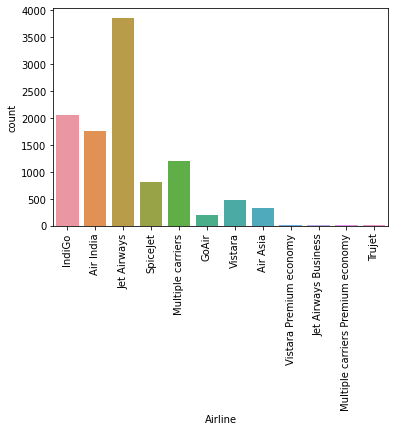

In [ ]:
ax=sns.countplot(x="Airline", data=df)
ax.set_xticklabels(labels=(df['Airline'].unique()).tolist()
,rotation=90)

[Text(0, 0, 'Banglore'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Mumbai')]

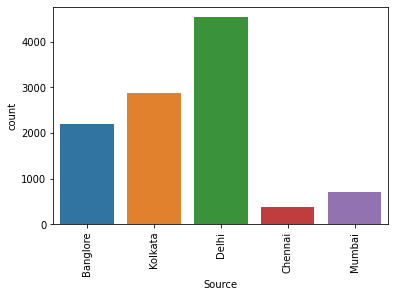

In [ ]:
ax=sns.countplot(x="Source", data=df)
ax.set_xticklabels(labels=(df['Source'].unique()).tolist()
,rotation=90)

[Text(0, 0, 'New Delhi'),
 Text(0, 0, 'Banglore'),
 Text(0, 0, 'Cochin'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Hyderabad')]

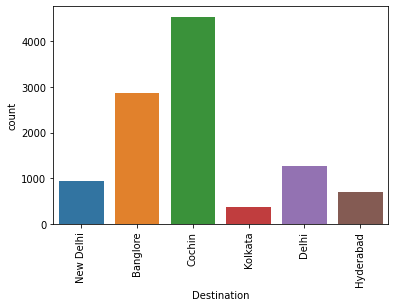

In [ ]:
ax=sns.countplot(x="Destination", data=df)
ax.set_xticklabels(labels=(df['Destination'].unique()).tolist()
,rotation=90)

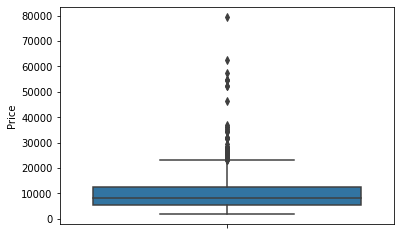

In [ ]:
ax=sns.boxplot(y='Price',data=df)

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Price    8372.0
dtype: float64

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Price    9087.064121
dtype: float64

# Preprocessing

In [ ]:
df['Destination']=df['Destination'].replace({"New Delhi":"Delhi"})
df=df[df['Total_Stops'].isnull()==False]
df['Route']=df['Route'].fillna(df['Route'].mode()

# Feature Extraction

In [ ]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [ ]:
splitted_dur=df['Duration'].str.split(' ',expand=True)
df['Duration(hrs)']=splitted_dur[0].apply(lambda x : x[:-1]).astype(int).add(splitted_dur[1].apply(lambda x : x[:-1] if x is not None else 0).astype(int)/60)

In [ ]:
df['Journey']=df['Source']+"_"+df['Destination']

In [ ]:
df["Journey"].unique()

array(['Banglore_Delhi', 'Kolkata_Banglore', 'Delhi_Cochin',
       'Chennai_Kolkata', 'Mumbai_Hyderabad'], dtype=object)

In [ ]:
df['Distance']=df['Journey'].map({'Banglore_Delhi':2158, 'Kolkata_Banglore':1544, 'Delhi_Cochin':2046,
       'Chennai_Kolkata':1678, 'Mumbai_Hyderabad':710})

In [ ]:
month=pd.to_datetime(df['Date_of_Journey']).apply(lambda x :x.month)
day=pd.to_datetime(df['Date_of_Journey']).apply(lambda x :x.day)
year=pd.to_datetime(df['Date_of_Journey']).apply(lambda x :x.year)
weekday=pd.to_datetime(df['Date_of_Journey']).apply(lambda x :x.weekday())
df['month']=month
df['day'] = day
df['weekday']=weekday

In [ ]:
week_day_end=pd.to_datetime(df['Date_of_Journey']).apply(lambda x : "Weekend" if x.weekday()>4 else "Weekday")
df['week_day_end']=week_day_end

In [ ]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline_coded']=le.fit_transform(df['Airline'])

In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
df['Total_Stops_coded']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3,'4 stops':4})
df['week_day_end_coded']=df['week_day_end'].map({'Weekday':0,'Weekend':1})

# Correlation Matrix

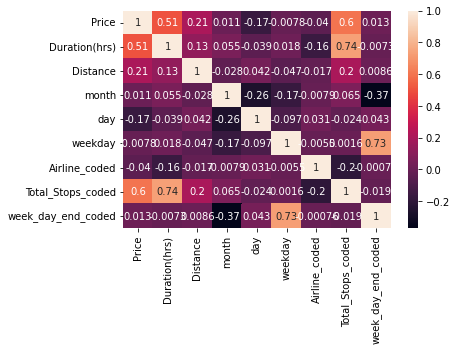

In [ ]:
ax = sns.heatmap(df.corr(),annot=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

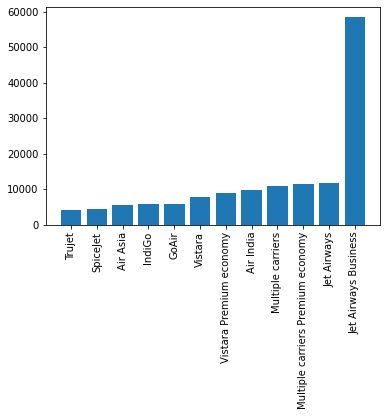

In [ ]:
x=df.groupby('Airline')['Price'].mean().sort_values()
plt.bar(x.index,x)
plt.xticks(rotation=90)

# Price and Distance

Text(0, 0.5, 'Price')

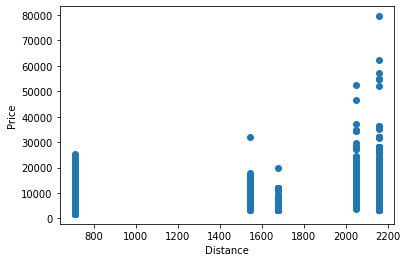

In [ ]:
plt.scatter(df['Distance'],df['Price'])
plt.xlabel('Distance')
plt.ylabel('Price')

Best week and month 

In [ ]:
df['month'].nunique()

7

<BarContainer object of 7 artists>

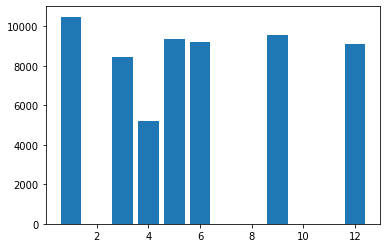

In [ ]:
month_price=df.groupby('month')['Price'].mean()
plt.bar(month_price.index,month_price)

In [ ]:
df.groupby('weekday')['Price'].mean()

weekday
0    9721.101945
1    8960.452265
2    7996.290807
3    9805.088646
4    8556.502220
5    8894.375727
6    9556.827684
Name: Price, dtype: float64

In [ ]:
df.groupby('Journey')['Price','Duration(hrs)'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Price,Duration(hrs)
Journey,,
Banglore_Delhi,8017.464269,6.272151
Chennai_Kolkata,4789.892388,2.326990
Delhi_Cochin,10539.439057,13.633091
Kolkata_Banglore,9158.389411,12.454139
Mumbai_Hyderabad,5059.708752,3.202296


Text(0.5, 0, 'Price')

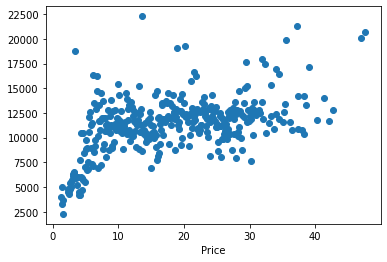

In [ ]:
dur_price=df.groupby(['Duration(hrs)'])['Price'].mean()
#dur_price
plt.scatter(dur_price.index,dur_price)
plt.xlabel('Duration(hrs)')
plt.xlabel('Price')

# Price on weekend

In [ ]:
week_day_end.value_counts()

Weekday    8418
Weekend    2265
Name: Date_of_Journey, dtype: int64

In [ ]:
wde=df.groupby('week_day_end')['Price'].mean()
wde

week_day_end
Weekday    9055.336303
Weekend    9204.982340
Name: Price, dtype: float64

([0, 1], <a list of 2 Text major ticklabel objects>)

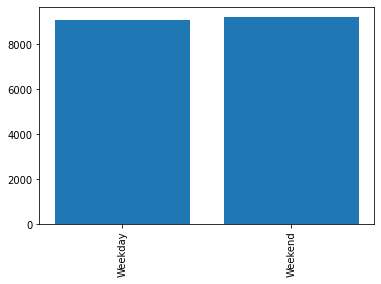

In [ ]:
plt.bar(wde.index,wde)
plt.xticks(rotation=90)

In [ ]:
y=df['Price']

In [ ]:
df_min=df.drop(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops','Price','Journey','Additional_Info','week_day_end','Duration(hrs)'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,y_train,y_test = train_test_split(df_min,y,test_size=0.2)

In [ ]:
from sklearn.metrics import r2_score

# Linear_Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(train_x,y_train)

LinearRegression()

In [ ]:
pred=model.predict(test_x)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,pred))

3561.0736786756997

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

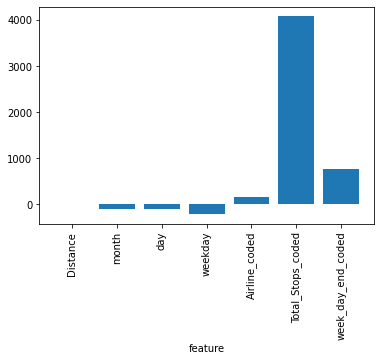

In [ ]:
importance = model.coef_
plt.bar(df_min.columns,importance)
plt.xlabel('feature')
plt.xticks(rotation=90)
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %s, Score: %.5f' % (df_min.columns[i],v))

# Random Forest

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_x, y_train);

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

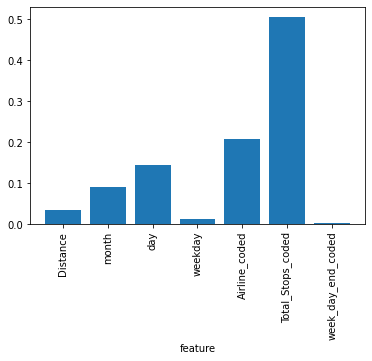

In [ ]:
importance = rf.feature_importances_
plt.bar(df_min.columns,importance)
plt.xlabel('feature')
plt.xticks(rotation=90)

In [ ]:
pred=rf.predict(test_x)
pred

array([ 9620.94583748, 12928.13436529,  5758.20287277, ...,
        6186.40592295,  9791.58262233, 15024.3044059 ])

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,pred))2222

2523.4478330996258

# SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

In [ ]:
svr_rbf.fit(train_x, y_train)

SVR(C=100, gamma=0.1)

In [ ]:
preed=svr_rbf.predict(test_x)

In [ ]:
np.sqrt(mean_squared_error(y_test,preed))

3559.8093215017925